In [ ]:
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

In [ ]:
# Date
data = np.array([56, 60, 58, 55, 57, 59, 61, 56, 58, 60])
x_bar = data.mean()
s = data.std(ddof=1)
print(f"Sample mean = {x_bar:.2f}, Sample std = {s:.2f}, n = {len(data)}")

#a
with pm.Model() as weak_model:
  mu = pm.Normal("mu", mu=x_bar, sigma=10)
  sigma = pm.HalfNormal("sigma", sigma=10)
  y = pm.Normal("y", mu=mu, sigma=sigma, observed=data)

  trace_weak = pm.sample(2000, tune=2000, target_accept=0.9, random_seed=42)
  summary_weak = az.summary(trace_weak, var_names=["mu", "sigma"], hdi_prob=0.95)

print("\nPosterior summaries (Weak Prior):")
print(summary_weak)

Sample mean = 58.00, Sample std = 2.00, n = 10


Output()


Posterior summaries (Weak Prior):
         mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
mu     58.001  0.766    56.415     59.504      0.020    0.020    1570.0   
sigma   2.348  0.677     1.307      3.706      0.016    0.018    1883.0   

       ess_tail  r_hat  
mu       1493.0    1.0  
sigma    2166.0    1.0  


In [ ]:
#b
mu_samples_weak = az.extract(trace_weak, var_names="mu", combined=True).to_numpy()
sigma_samples_weak = az.extract(trace_weak, var_names="sigma", combined=True).to_numpy()
hdi_mu_weak = az.hdi(mu_samples_weak, hdi_prob=0.95)
hdi_sigma_weak = az.hdi(sigma_samples_weak, hdi_prob=0.95)
print(f"95% HDI mu (weak): [{hdi_mu_weak[0]:.3f}, {hdi_mu_weak[1]:.3f}]")
print(f"95% HDI sigma (weak): [{hdi_sigma_weak[0]:.3f}, {hdi_sigma_weak[1]:.3f}]")

95% HDI mu (weak): [56.415, 59.504]
95% HDI sigma (weak): [1.307, 3.706]


In [ ]:
#c
print("\nFrequentist estimates:")
print(f"Mean: {np.mean(data):.2f}")
print(f"SD:   {np.std(data, ddof=1):.2f}")


Frequentist estimates:
Mean: 58.00
SD:   2.00


Output()


Posterior summaries (Strong Prior):
         mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
mu     51.334  1.081    49.152     53.319      0.025    0.018    1825.0   
sigma   7.653  2.142     4.138     12.006      0.051    0.060    1782.0   

       ess_tail  r_hat  
mu       2018.0    1.0  
sigma    2198.0    1.0  
95% HDI mu (strong): [49.152, 53.319]
95% HDI sigma (strong): [4.138, 12.006]


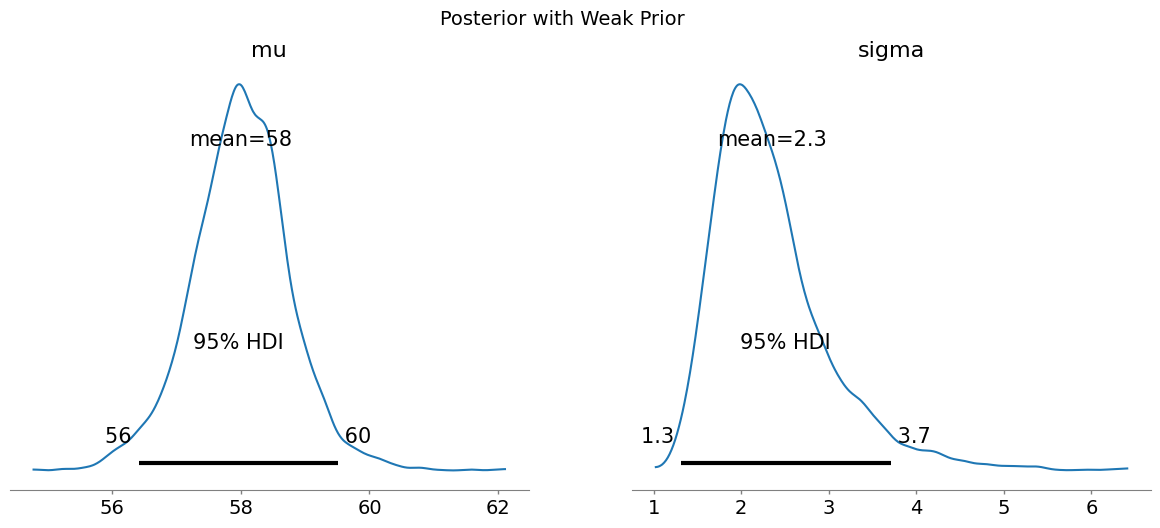

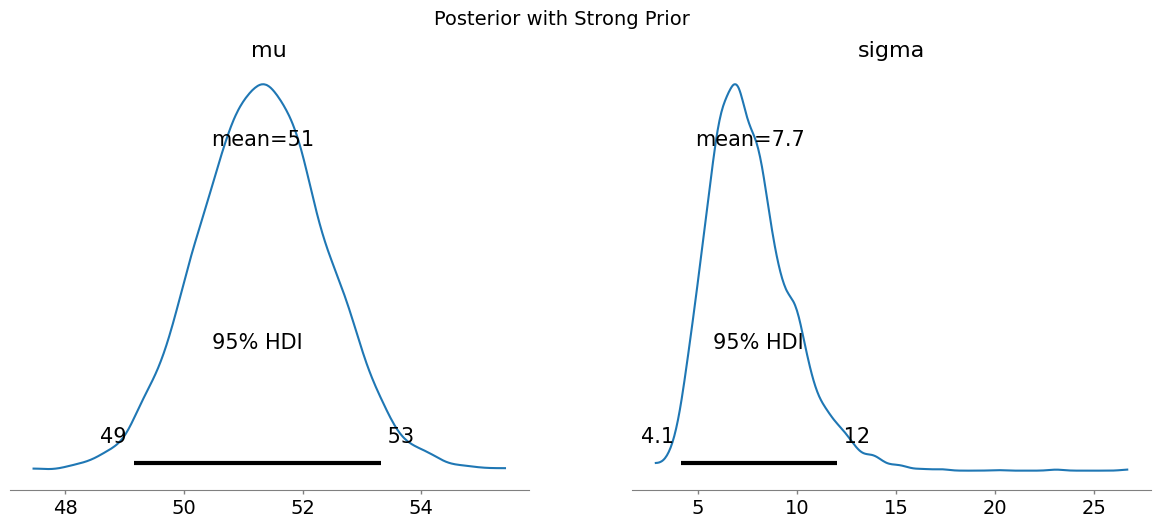

In [ ]:
#d
with pm.Model() as strong_model:
  mu = pm.Normal("mu", mu=50, sigma=1)
  sigma = pm.HalfNormal("sigma", sigma=10)
  y = pm.Normal("y", mu=mu, sigma=sigma, observed=data)
  trace_strong = pm.sample(2000, tune=2000, target_accept=0.9, random_seed=42)
  summary_strong = az.summary(trace_strong, var_names=["mu", "sigma"], hdi_prob=0.95)

print("\nPosterior summaries (Strong Prior):")
print(summary_strong)

mu_samples_strong = az.extract(trace_strong, var_names="mu", combined=True).to_numpy()
sigma_samples_strong = az.extract(trace_strong, var_names="sigma", combined=True).to_numpy()
hdi_mu_strong = az.hdi(mu_samples_strong, hdi_prob=0.95)
hdi_sigma_strong = az.hdi(sigma_samples_strong, hdi_prob=0.95)
print(f"95% HDI mu (strong): [{hdi_mu_strong[0]:.3f}, {hdi_mu_strong[1]:.3f}]")
print(f"95% HDI sigma (strong): [{hdi_sigma_strong[0]:.3f}, {hdi_sigma_strong[1]:.3f}]")

az.plot_posterior(trace_weak, var_names=["mu", "sigma"], hdi_prob=0.95)
plt.suptitle("Posterior with Weak Prior", fontsize=14)
plt.show()

az.plot_posterior(trace_strong, var_names=["mu", "sigma"], hdi_prob=0.95)
plt.suptitle("Posterior with Strong Prior", fontsize=14)
plt.show()